In [ ]:
# Mount Google Colab drive for convenience

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Using Kaggle API Key

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [ ]:
# Download our CSV Dataset

!kaggle datasets download -d aravindpcoder/diabetes-dataset

  0% 0.00/15.6k [00:00<?, ?B/s]
100% 15.6k/15.6k [00:00<00:00, 9.10MB/s]


In [ ]:
# Unzip and remove the dataset zip

!unzip \*.zip  && rm *.zip

Archive:  diabetes-dataset.zip
  inflating: Dataset of Diabetes .csv  


In [ ]:
# Let's prepare our training and test variables with dataframes

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


csv_path = '/content/Dataset of Diabetes .csv'

df = pd.read_csv(csv_path, header = None)
df = df.drop(df.index[0]).reset_index(drop=True)
# We can safely drop column 1 since it's only patient number, won't be of any use and might create errors in training
df = df.drop(1, axis=1)

le = LabelEncoder()
df[2] = le.fit_transform(df[2])

# There is a slight error in the column 13 where the classes are, some have an extra blank space so we remove it
df[13] = df[13].str.strip()
df[13] = le.fit_transform(df[13])

X = df.iloc[:, :-1]

y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Can be a mess in the visualization, but it's just for assurance

print(X)

print(y)

print(X_train)

print(y_train)

      0   2   3     4    5     6    7    8    9    10    11     12
520  784   0  61   4.1   45     8  4.2  0.9  1.6  1.3   1.5     33
521   38   0  54  11.3  130   7.7  6.3  5.4  0.8  3.3   2.4     33
522   84   0  60   4.1   56  13.1  4.4    2    1  2.5   0.9     29
523  153   1  60   5.5   70  10.4  9.9  3.5    1  7.5   1.5     31
524  157   1  63   4.4   57  11.3  9.8  1.9  1.1  7.9   0.8     35
525  557   1  55   4.2   68   8.3  4.8  3.1  0.4  2.4   1.4     33
526  604   1  66   5.5   73  10.9  9.3  5.1  0.9  6.4    35  27.75
527  439   1  52   4.9   68  10.2  5.9  2.9    1  3.6   1.3     39
528  493   0  51   4.1   78   7.2  7.2  5.3    1  3.8   2.4     38
529  606   1  55     5   73   6.5  4.7  2.1  1.1  2.7    31   35.2
530   20   0  58   5.8   41   9.7    5  4.5  1.1  2.2     2     37
531  376   0  56   5.6   45  10.8  4.2  2.2    1  2.2     1     26
532  617   1  55  4.66   70   7.5  7.3  1.6  1.2  5.5  11.3  36.11
533  216   1  55    22  145     8  6.7  3.7  1.7    2   1.5   

In [ ]:
# Decision Tree is a good option for categorical classification

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

# We can easily train it with a 1000x12 X_train and get the results quite fast
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.98


In [ ]:
#Let's see what we get in metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(classification_report(y_test, y_pred))



[[ 19   0   2]
 [  0   6   0]
 [  1   1 171]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.86      1.00      0.92         6
           2       0.99      0.99      0.99       173

    accuracy                           0.98       200
   macro avg       0.93      0.96      0.95       200
weighted avg       0.98      0.98      0.98       200



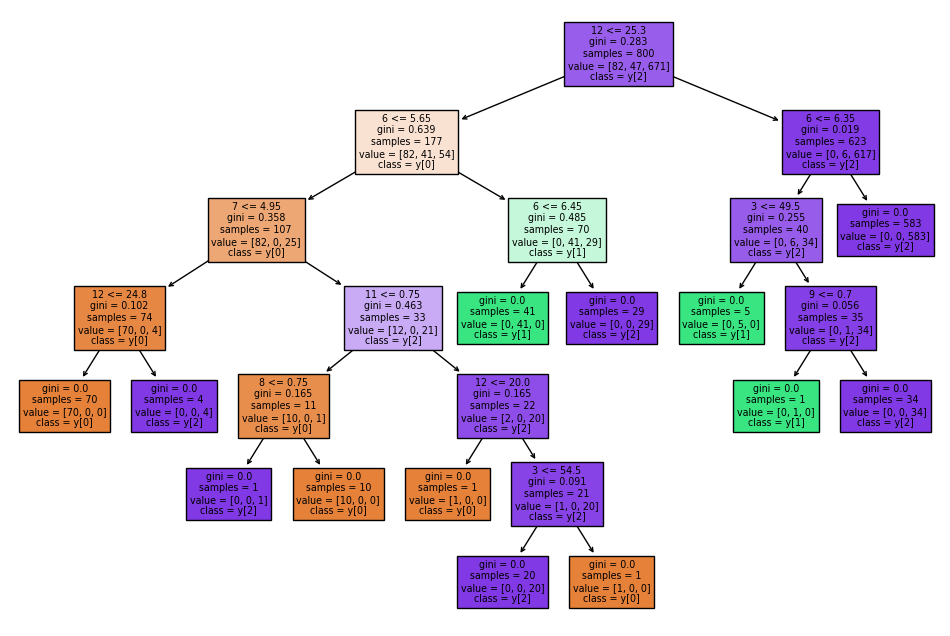

In [ ]:
# Let's take a look at how our tree got built

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=True)
plt.show()

In [ ]:
# Now, for a simple prediction test

prediction_test = pd.DataFrame({
    0: [106],
    2: [0],
    3: [44],
    4: [4.3],
    5: [49],
    6: [4],
    7: [5.6],
    8: [1.4],
    9: [1.4],
    10: [3.6],
    11: [0.6],
    12: [22]
})

prediction = dt_classifier.predict(prediction_test)

if prediction == 0:
  print("Prediction was: N, no conclusion of diabetes")
elif prediction == 1:
  print("Prediction was: P, prediction of future diabetes")
else:
  print("Prediction was: Y, highest probability of diabetes")


N


In [ ]:
# For curiosity, we can take a look at how our decision tree was activated during this test

import numpy as np

decision_path = dt_classifier.decision_path(prediction_test)
dense_decision_path = decision_path.toarray()

print("Dense Decision Path:")
print(dense_decision_path)

activated_nodes = np.where(dense_decision_path)[1]
print("\nActivated Nodes:")
print(activated_nodes)

Dense Decision Path:
[[1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]

Activated Nodes:
[0 1 2 6 7 9]
